
#### Adeniyi Adeboye
### Winter 2022 Data Science Intern Challenge

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_context("talk")

### Question 1:

##### a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

##### b. What metric would you report for this dataset?

##### c. What is its value?


In [2]:
data = pd.read_csv("/Users/adadeboy/Downloads/shopify_data.csv")

In [3]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


##### - Lets verify that the time window for this dataset is 30 days

In [4]:
data['created_at'] = pd.to_datetime(data['created_at'])
print(f"Earliest day of purchase: {min(data['created_at'])} \nLast Day of purchase: {max(data['created_at'])}")

Earliest day of purchase: 2017-03-01 00:08:09 
Last Day of purchase: 2017-03-30 23:55:35


#### 1. Lets check the distribution of total_items purchased

In [5]:
data_value_cts = data['total_items'].value_counts()

Text(0.5, 1.0, 'Total items purchased distribution')

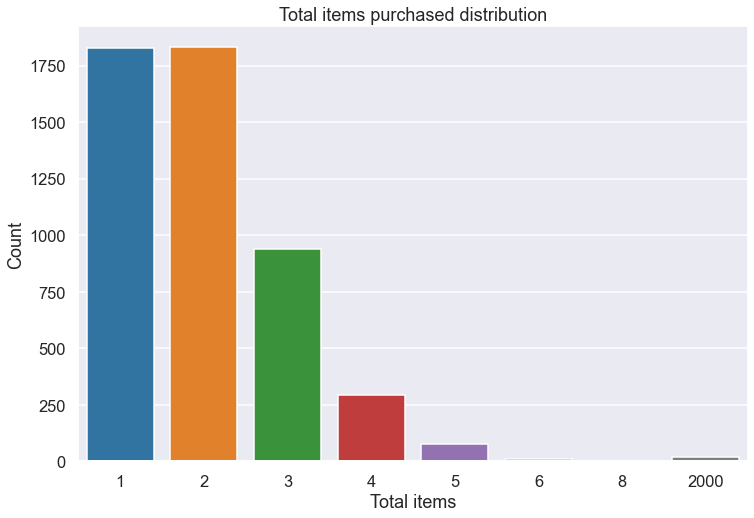

In [6]:
plt.figure(figsize=(12,8))
sns.barplot(x=data_value_cts.index.tolist(), y=data_value_cts.values.tolist())
plt.xlabel("Total items")
plt.ylabel("Count")
plt.title("Total items purchased distribution")

- As observed above, the total items purchased per transaction are mostly between 1 - 8 items, **except for 2000 items purchased at once** which is clearly an outlier in regards to the total items purchased per transactions.

#### 2. Let's check the transactions with 2000 total items

In [7]:
data[data["total_items"] == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 04:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 04:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 04:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 04:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 04:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 04:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 04:00:00


- As observed above, the total_items == 2000, has a very HIGH order amount value (704000) which is significantly higher than others, and also what is interestting is that this particular purchase comes from: 
    - **Unique customer (user id == 607)**
    - **Unique shop (shop id == 42)**
    - **Unique payment method (credit card)**
    - **Unique timestamp (04:00:00)**
- This may indicate that this specific customer is purchasing the shoes in bulk as a **Wholesaler** and reselling and redistributing these shoes to **retailers** at a much higher rate than how much he/she bought it.
- This may also be anomaly in the dataset maybe duplicate entries for the same customer, shop and timestamp.

#### 3. Lets take a look into the measures of central tendency (Mean & Median) and Max for each of the total_items purchased

In [8]:
agg_dict = {
    "avg_order_value_per_item": pd.NamedAgg(column='order_amount', aggfunc=np.mean),
    "median_order_value_per_item": pd.NamedAgg(column='order_amount', aggfunc=np.median),
    "max_order_value_per_item": pd.NamedAgg(column='order_amount', aggfunc=np.max),
    "min_order_value_per_item": pd.NamedAgg(column='order_amount', aggfunc=np.min)
}
data_agg = data.groupby("total_items").agg(**agg_dict)

In [9]:
data_agg

,avg_order_value_per_item,median_order_value_per_item,max_order_value_per_item,min_order_value_per_item
total_items,,,,
1,417.364481,153,25725,90
2,750.215066,306,51450,180
3,1191.076514,459,77175,270
4,947.686007,592,102900,360
5,759.350649,765,1760,450
6,17940.000000,948,154350,774
8,1064.000000,1064,1064,1064
2000,704000.000000,704000,704000,704000


- As observed from the above table, there are huge differences between the min and max items purchased for total_items 1,2,3,4,6 which may **indicate data entry error** since WE DO NOT EXPECT TO PAY:
    - $$25725 for a 1 item (a pair of shoes) transaction
    - $51450 for a 2 item (two pair of shoes) transaction
    - $77175 for a 3 item (three pair of shoes) transaction
    - $102900 for a 4 items (four pair of shoes) transaction
    - $154350 for a 6 items (six pair of shoes) transaction
---------------------------------------------
- Another key observation is that, you notice that for each total item class, even though the average order value tends to significantly differ from the minimum order value, **the median order value stays consistently close to the minimum value, i.e. NOT affected by the maximum outliers order value for each total item**


#### 4. Lets look at the order amount distribution for each total_item class

In [10]:
data['total_items_str'] = data['total_items'].astype('str')

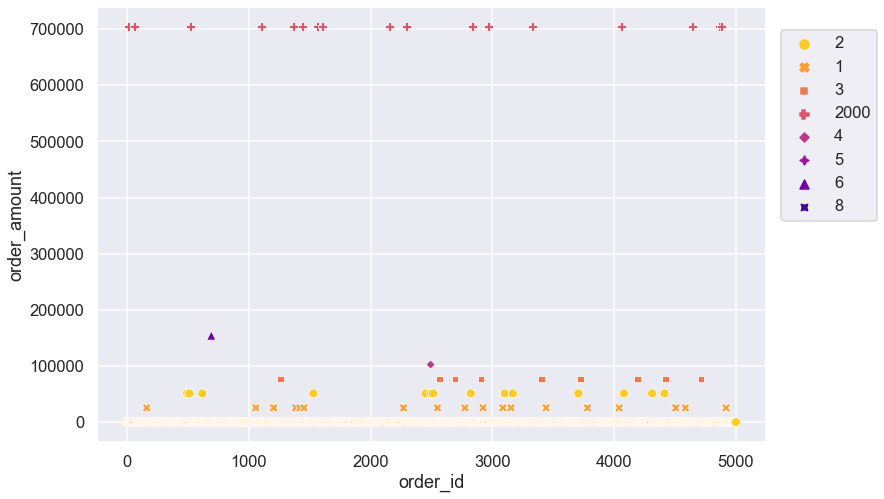

In [11]:
plt.figure(figsize=(12,8))
fig = sns.scatterplot(data=data, x="order_id", y="order_amount", hue="total_items_str", 
                      style="total_items_str", palette = "plasma_r")
fig.legend(bbox_to_anchor=(1.01, 0.49), loc='lower left')

<AxesSubplot:xlabel='total_items', ylabel='order_amount'>

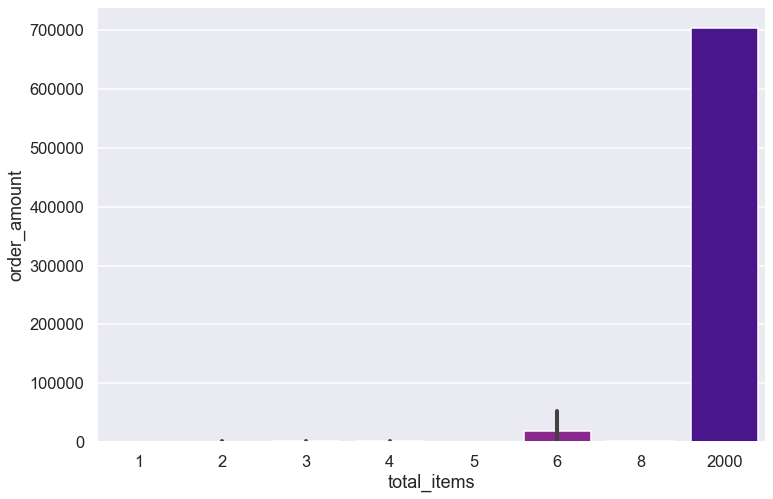

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x="total_items", y="order_amount", data=data, palette = "plasma_r")

- As observed from the above plots, the **HIGH order amounts values** from total_items: 1,2,3,6 and 2000 which may seems to be **outliers** especially for 1,2,3 and 6 dominate the scatter plots and furthermore in the bar plots, the order amount from 2000 total_items class clearly dominate the distribution. 

--------------------------

- This distribution of outliers clearly indicate that the **Average order value** cannot be used as a metric to evaluate the growth of this eCommerce business.

- This is because **Average order value** is highly susceptible to the influence of the outliers, and is strongly influenced when the distribution of the order amount (in our case) is highly skewed.

#### 5. Median order value 

- Median is less affected by outliers and skewed data and will never be influenced by the impact of the abrupt HIGH order value amount given to low total items classes such as 1, 2, 3.

In [13]:
print(f"Preferred metric - Median order value: {np.median(data['order_amount'])}")

Preferred metric - Median order value: 284.0


#### Questions 1 (Answers)

##### a. As observed from my above analytic approach to understand the dataset and identify what is going wrong with the calculation, the following were deduced:

- The 17 purchases of 2000 total_items seems to be a predominant outlier in the dataset; furthermore, their seems to be also significantly high order amount for some of the 1,2,3,4 and 6 total_items purchases which also seems to be due to data entry errors. 

- Due to the above identified outliers, the average order value cannot be considered a value metric for ecommece business, and a better way to calculate the order value will be using **"MEDIAN"**

- Why median, This is because Median is less affected by outliers and not influenced or impacted by skewed data.

##### b. I reported the Median order value after the analytic approach I took to identify the outliers.

##### c. Median order value = 284.0


### Question 2: 

For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

**a. How many orders were shipped by Speedy Express in total?**

SELECT COUNT(*) as orders_count

FROM Orders as o

INNER JOIN Shippers as s

ON s.ShipperID = o.ShipperID

WHERE s.ShipperName = 'Speedy Express'

ORDER BY 1 DESC;

**ANSWER: 54**

**b. What is the last name of the employee with the most orders?**

SELECT e.LastName, COUNT(*) as orders_count

FROM Orders as o

INNER JOIN Employees as e

ON e.EmployeeID = o.EmployeeID

GROUP BY e.LastName

ORDER BY orders_count DESC

LIMIT 1;

**ANSWER: Peacock
(40 orders)**

**c. What product was ordered the most by customers in Germany?**


SELECT p.ProductID, p.ProductName, SUM(Quantity) AS TotalQuantity

FROM Orders AS o, OrderDetails AS od, Customers AS c, Products AS p

WHERE c.Country = "Germany" AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND c.CustomerID = o.CustomerID

GROUP BY p.ProductID

ORDER BY TotalQuantity DESC

LIMIT 1;

**ANSWER: Boston Crab Meat
(ProductID: 40, TotalQuantity: 160)**

